## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  64.435126  1243.004779  0.662574   5.527404  1.489615
1  60.909126  1548.193345  0.490452   2.729660  1.557819
2  64.159209  1359.103374  0.592512  10.760294  1.455231
3  45.056158   126.874184  0.219849   6.713925  0.623215
4  10.958581  1734.983125  0.425685   1.946702  1.419970


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.22713 | train_mse: 4.25131 | train_mae: 1.52268 |  0:00:00s
epoch 1  | loss: 0.72401 | train_mse: 3.74464 | train_mae: 1.4374  |  0:00:00s
epoch 2  | loss: 0.91333 | train_mse: 2.42783 | train_mae: 1.19119 |  0:00:00s


epoch 3  | loss: 0.63333 | train_mse: 1.38476 | train_mae: 0.918   |  0:00:00s
epoch 4  | loss: 0.73361 | train_mse: 1.21159 | train_mae: 0.84399 |  0:00:00s


epoch 5  | loss: 0.66821 | train_mse: 1.2593  | train_mae: 0.83772 |  0:00:00s
epoch 6  | loss: 0.56224 | train_mse: 1.71503 | train_mae: 0.93105 |  0:00:00s
epoch 7  | loss: 0.49754 | train_mse: 1.84061 | train_mae: 0.95155 |  0:00:00s


epoch 8  | loss: 0.50068 | train_mse: 1.50628 | train_mae: 0.84374 |  0:00:00s
epoch 9  | loss: 0.44782 | train_mse: 1.40132 | train_mae: 0.84305 |  0:00:01s


epoch 10 | loss: 0.56207 | train_mse: 1.38042 | train_mae: 0.83283 |  0:00:01s
epoch 11 | loss: 0.38549 | train_mse: 1.13929 | train_mae: 0.7765  |  0:00:01s
epoch 12 | loss: 0.33596 | train_mse: 1.51733 | train_mae: 0.82483 |  0:00:01s


epoch 13 | loss: 0.34992 | train_mse: 1.48251 | train_mae: 0.80617 |  0:00:01s
epoch 14 | loss: 0.38204 | train_mse: 1.07589 | train_mae: 0.73475 |  0:00:01s
epoch 15 | loss: 0.29203 | train_mse: 0.49528 | train_mae: 0.54848 |  0:00:01s


epoch 16 | loss: 0.45272 | train_mse: 0.39731 | train_mae: 0.50171 |  0:00:01s
epoch 17 | loss: 0.37673 | train_mse: 0.5477  | train_mae: 0.56812 |  0:00:01s
epoch 18 | loss: 0.3074  | train_mse: 0.48422 | train_mae: 0.54229 |  0:00:01s
epoch 19 | loss: 0.21288 | train_mse: 0.42039 | train_mae: 0.51965 |  0:00:01s


epoch 20 | loss: 0.47749 | train_mse: 0.37387 | train_mae: 0.48225 |  0:00:01s
epoch 21 | loss: 0.38516 | train_mse: 0.23424 | train_mae: 0.39712 |  0:00:01s
epoch 22 | loss: 0.28359 | train_mse: 0.28757 | train_mae: 0.43772 |  0:00:01s
epoch 23 | loss: 0.23933 | train_mse: 0.31559 | train_mae: 0.45802 |  0:00:01s


epoch 24 | loss: 0.3666  | train_mse: 0.21796 | train_mae: 0.39545 |  0:00:02s
epoch 25 | loss: 0.54854 | train_mse: 0.20412 | train_mae: 0.37527 |  0:00:02s
epoch 26 | loss: 0.30023 | train_mse: 0.21201 | train_mae: 0.38608 |  0:00:02s


epoch 27 | loss: 0.26279 | train_mse: 0.26857 | train_mae: 0.41719 |  0:00:02s
epoch 28 | loss: 0.32229 | train_mse: 0.33276 | train_mae: 0.45394 |  0:00:02s
epoch 29 | loss: 0.26143 | train_mse: 0.36722 | train_mae: 0.44678 |  0:00:02s
epoch 30 | loss: 0.41814 | train_mse: 0.31781 | train_mae: 0.4046  |  0:00:02s


epoch 31 | loss: 0.30623 | train_mse: 0.26909 | train_mae: 0.38413 |  0:00:02s
epoch 32 | loss: 0.25536 | train_mse: 0.16951 | train_mae: 0.32708 |  0:00:02s
epoch 33 | loss: 0.23538 | train_mse: 0.20739 | train_mae: 0.36126 |  0:00:02s
epoch 34 | loss: 0.17033 | train_mse: 0.20805 | train_mae: 0.35633 |  0:00:02s


epoch 35 | loss: 0.45166 | train_mse: 0.21673 | train_mae: 0.35683 |  0:00:02s
epoch 36 | loss: 0.19527 | train_mse: 0.2162  | train_mae: 0.33694 |  0:00:02s
epoch 37 | loss: 0.47211 | train_mse: 0.21192 | train_mae: 0.33313 |  0:00:02s


epoch 38 | loss: 0.1793  | train_mse: 0.16862 | train_mae: 0.30546 |  0:00:02s
epoch 39 | loss: 0.2387  | train_mse: 0.13752 | train_mae: 0.28626 |  0:00:03s
epoch 40 | loss: 0.25511 | train_mse: 0.1655  | train_mae: 0.30716 |  0:00:03s


epoch 41 | loss: 0.28925 | train_mse: 0.12297 | train_mae: 0.27477 |  0:00:03s
epoch 42 | loss: 0.25291 | train_mse: 0.12688 | train_mae: 0.27482 |  0:00:03s
epoch 43 | loss: 0.241   | train_mse: 0.12182 | train_mae: 0.26796 |  0:00:03s


epoch 44 | loss: 0.22384 | train_mse: 0.14388 | train_mae: 0.29139 |  0:00:03s
epoch 45 | loss: 0.15536 | train_mse: 0.1914  | train_mae: 0.31542 |  0:00:03s
epoch 46 | loss: 0.25839 | train_mse: 0.21336 | train_mae: 0.33635 |  0:00:03s


epoch 47 | loss: 0.1466  | train_mse: 0.25766 | train_mae: 0.35174 |  0:00:03s
epoch 48 | loss: 0.16914 | train_mse: 0.50732 | train_mae: 0.47037 |  0:00:03s
epoch 49 | loss: 0.29291 | train_mse: 0.53517 | train_mae: 0.48176 |  0:00:03s
epoch 50 | loss: 0.26871 | train_mse: 0.52942 | train_mae: 0.49638 |  0:00:03s


epoch 51 | loss: 0.16309 | train_mse: 0.31498 | train_mae: 0.40569 |  0:00:03s
epoch 52 | loss: 0.1775  | train_mse: 0.19257 | train_mae: 0.35253 |  0:00:03s
epoch 53 | loss: 0.19699 | train_mse: 0.1502  | train_mae: 0.31068 |  0:00:04s


epoch 54 | loss: 0.27849 | train_mse: 0.14027 | train_mae: 0.29089 |  0:00:04s
epoch 55 | loss: 0.3281  | train_mse: 0.13719 | train_mae: 0.2881  |  0:00:04s
epoch 56 | loss: 0.15688 | train_mse: 0.14854 | train_mae: 0.29665 |  0:00:04s


epoch 57 | loss: 0.19745 | train_mse: 0.1533  | train_mae: 0.30156 |  0:00:04s
epoch 58 | loss: 0.1502  | train_mse: 0.13796 | train_mae: 0.29273 |  0:00:04s
epoch 59 | loss: 0.15341 | train_mse: 0.10266 | train_mae: 0.26931 |  0:00:04s
epoch 60 | loss: 0.15123 | train_mse: 0.10116 | train_mae: 0.27136 |  0:00:04s


epoch 61 | loss: 0.1398  | train_mse: 0.1077  | train_mae: 0.2746  |  0:00:04s
epoch 62 | loss: 0.13562 | train_mse: 0.11996 | train_mae: 0.27832 |  0:00:04s
epoch 63 | loss: 0.17985 | train_mse: 0.16546 | train_mae: 0.30459 |  0:00:04s


epoch 64 | loss: 0.11203 | train_mse: 0.15883 | train_mae: 0.30651 |  0:00:04s
epoch 65 | loss: 0.16434 | train_mse: 0.18778 | train_mae: 0.3219  |  0:00:04s
epoch 66 | loss: 0.42126 | train_mse: 0.16297 | train_mae: 0.30381 |  0:00:05s


epoch 67 | loss: 0.26142 | train_mse: 0.16824 | train_mae: 0.30272 |  0:00:05s
epoch 68 | loss: 0.17774 | train_mse: 0.1316  | train_mae: 0.28339 |  0:00:05s
epoch 69 | loss: 0.26567 | train_mse: 0.14438 | train_mae: 0.30983 |  0:00:05s


epoch 70 | loss: 0.20205 | train_mse: 0.13477 | train_mae: 0.2981  |  0:00:05s
epoch 71 | loss: 0.20448 | train_mse: 0.17373 | train_mae: 0.31457 |  0:00:05s
epoch 72 | loss: 0.19794 | train_mse: 0.16412 | train_mae: 0.30864 |  0:00:05s


epoch 73 | loss: 0.27308 | train_mse: 0.09631 | train_mae: 0.25374 |  0:00:05s


epoch 74 | loss: 0.11785 | train_mse: 0.10343 | train_mae: 0.25567 |  0:00:05s
epoch 75 | loss: 0.21133 | train_mse: 0.11336 | train_mae: 0.26229 |  0:00:06s
epoch 76 | loss: 0.15788 | train_mse: 0.09191 | train_mae: 0.23706 |  0:00:06s


epoch 77 | loss: 0.12822 | train_mse: 0.0866  | train_mae: 0.23183 |  0:00:06s


epoch 78 | loss: 0.14916 | train_mse: 0.10233 | train_mae: 0.25236 |  0:00:06s


epoch 79 | loss: 0.12347 | train_mse: 0.09553 | train_mae: 0.24474 |  0:00:06s
epoch 80 | loss: 0.11846 | train_mse: 0.08581 | train_mae: 0.2364  |  0:00:06s


epoch 81 | loss: 0.12568 | train_mse: 0.08803 | train_mae: 0.23934 |  0:00:07s


epoch 82 | loss: 0.11738 | train_mse: 0.08512 | train_mae: 0.22644 |  0:00:07s
epoch 83 | loss: 0.10131 | train_mse: 0.11004 | train_mae: 0.25251 |  0:00:07s


epoch 84 | loss: 0.2747  | train_mse: 0.11875 | train_mae: 0.24386 |  0:00:07s


epoch 85 | loss: 0.2532  | train_mse: 0.12595 | train_mae: 0.25115 |  0:00:08s
epoch 86 | loss: 0.30848 | train_mse: 0.14408 | train_mae: 0.27207 |  0:00:08s


epoch 87 | loss: 0.18078 | train_mse: 0.10425 | train_mae: 0.24917 |  0:00:08s
epoch 88 | loss: 0.17411 | train_mse: 0.09321 | train_mae: 0.23915 |  0:00:08s


epoch 89 | loss: 0.16097 | train_mse: 0.11144 | train_mae: 0.26077 |  0:00:08s


epoch 90 | loss: 0.11686 | train_mse: 0.13841 | train_mae: 0.27799 |  0:00:08s
epoch 91 | loss: 0.18263 | train_mse: 0.155   | train_mae: 0.28698 |  0:00:09s


epoch 92 | loss: 0.20494 | train_mse: 0.12591 | train_mae: 0.26461 |  0:00:09s
epoch 93 | loss: 0.24306 | train_mse: 0.12716 | train_mae: 0.26973 |  0:00:09s
epoch 94 | loss: 0.26788 | train_mse: 0.09249 | train_mae: 0.23229 |  0:00:09s


epoch 95 | loss: 0.10211 | train_mse: 0.08463 | train_mae: 0.22228 |  0:00:09s
epoch 96 | loss: 0.2824  | train_mse: 0.09831 | train_mae: 0.23856 |  0:00:09s
epoch 97 | loss: 0.17083 | train_mse: 0.13204 | train_mae: 0.26399 |  0:00:09s


epoch 98 | loss: 0.14215 | train_mse: 0.0856  | train_mae: 0.23216 |  0:00:09s
epoch 99 | loss: 0.10757 | train_mse: 0.07972 | train_mae: 0.22883 |  0:00:09s
epoch 100| loss: 0.17573 | train_mse: 0.06923 | train_mae: 0.20897 |  0:00:09s


epoch 101| loss: 0.09698 | train_mse: 0.06754 | train_mae: 0.20149 |  0:00:09s
epoch 102| loss: 0.10013 | train_mse: 0.06033 | train_mae: 0.18594 |  0:00:10s
epoch 103| loss: 0.18527 | train_mse: 0.06068 | train_mae: 0.18909 |  0:00:10s


epoch 104| loss: 0.15516 | train_mse: 0.07157 | train_mae: 0.20893 |  0:00:10s
epoch 105| loss: 0.08338 | train_mse: 0.1024  | train_mae: 0.24644 |  0:00:10s
epoch 106| loss: 0.15136 | train_mse: 0.11695 | train_mae: 0.26084 |  0:00:10s


epoch 107| loss: 0.15246 | train_mse: 0.13213 | train_mae: 0.26914 |  0:00:10s
epoch 108| loss: 0.10855 | train_mse: 0.12004 | train_mae: 0.25595 |  0:00:10s
epoch 109| loss: 0.20141 | train_mse: 0.10141 | train_mae: 0.24498 |  0:00:10s


epoch 110| loss: 0.21312 | train_mse: 0.11053 | train_mae: 0.25287 |  0:00:10s
epoch 111| loss: 0.24267 | train_mse: 0.17047 | train_mae: 0.29108 |  0:00:11s
epoch 112| loss: 0.08574 | train_mse: 0.12611 | train_mae: 0.26683 |  0:00:11s


epoch 113| loss: 0.25237 | train_mse: 0.1071  | train_mae: 0.24941 |  0:00:11s
epoch 114| loss: 0.13767 | train_mse: 0.13689 | train_mae: 0.26659 |  0:00:11s
epoch 115| loss: 0.21139 | train_mse: 0.17044 | train_mae: 0.28024 |  0:00:11s


epoch 116| loss: 0.11564 | train_mse: 0.08015 | train_mae: 0.22248 |  0:00:11s
epoch 117| loss: 0.1969  | train_mse: 0.07709 | train_mae: 0.22897 |  0:00:11s
epoch 118| loss: 0.36526 | train_mse: 0.08253 | train_mae: 0.23614 |  0:00:11s


epoch 119| loss: 0.1845  | train_mse: 0.08038 | train_mae: 0.22474 |  0:00:11s
epoch 120| loss: 0.27836 | train_mse: 0.06987 | train_mae: 0.21161 |  0:00:11s


epoch 121| loss: 0.18985 | train_mse: 0.08014 | train_mae: 0.2185  |  0:00:12s
epoch 122| loss: 0.24565 | train_mse: 0.06723 | train_mae: 0.20153 |  0:00:12s


epoch 123| loss: 0.12317 | train_mse: 0.07315 | train_mae: 0.21091 |  0:00:12s
epoch 124| loss: 0.09455 | train_mse: 0.10489 | train_mae: 0.24783 |  0:00:12s
epoch 125| loss: 0.07359 | train_mse: 0.13095 | train_mae: 0.26521 |  0:00:12s


epoch 126| loss: 0.14125 | train_mse: 0.09898 | train_mae: 0.23638 |  0:00:12s
epoch 127| loss: 0.08315 | train_mse: 0.08564 | train_mae: 0.22213 |  0:00:12s


epoch 128| loss: 0.16526 | train_mse: 0.0654  | train_mae: 0.19585 |  0:00:12s
epoch 129| loss: 0.08625 | train_mse: 0.06375 | train_mae: 0.1905  |  0:00:12s


epoch 130| loss: 0.11637 | train_mse: 0.06731 | train_mae: 0.20128 |  0:00:13s
epoch 131| loss: 0.11625 | train_mse: 0.07676 | train_mae: 0.21851 |  0:00:13s
epoch 132| loss: 0.12329 | train_mse: 0.09334 | train_mae: 0.2298  |  0:00:13s
epoch 133| loss: 0.08288 | train_mse: 0.13126 | train_mae: 0.25109 |  0:00:13s


epoch 134| loss: 0.10698 | train_mse: 0.13039 | train_mae: 0.25602 |  0:00:13s
epoch 135| loss: 0.2973  | train_mse: 0.10902 | train_mae: 0.23492 |  0:00:13s
epoch 136| loss: 0.13462 | train_mse: 0.08152 | train_mae: 0.21109 |  0:00:13s


epoch 137| loss: 0.09754 | train_mse: 0.06255 | train_mae: 0.18608 |  0:00:13s
epoch 138| loss: 0.11203 | train_mse: 0.07566 | train_mae: 0.19597 |  0:00:13s
epoch 139| loss: 0.25284 | train_mse: 0.1101  | train_mae: 0.23163 |  0:00:13s


epoch 140| loss: 0.09559 | train_mse: 0.14458 | train_mae: 0.25087 |  0:00:13s
epoch 141| loss: 0.05007 | train_mse: 0.11658 | train_mae: 0.23237 |  0:00:13s
epoch 142| loss: 0.07718 | train_mse: 0.09147 | train_mae: 0.21213 |  0:00:13s


epoch 143| loss: 0.12289 | train_mse: 0.0869  | train_mae: 0.20853 |  0:00:14s
epoch 144| loss: 0.16702 | train_mse: 0.08014 | train_mae: 0.20704 |  0:00:14s
epoch 145| loss: 0.10382 | train_mse: 0.07635 | train_mae: 0.21216 |  0:00:14s
epoch 146| loss: 0.20824 | train_mse: 0.10271 | train_mae: 0.22945 |  0:00:14s


epoch 147| loss: 0.16375 | train_mse: 0.11391 | train_mae: 0.24267 |  0:00:14s
epoch 148| loss: 0.19981 | train_mse: 0.12114 | train_mae: 0.25381 |  0:00:14s
epoch 149| loss: 0.12734 | train_mse: 0.12169 | train_mae: 0.25159 |  0:00:14s
epoch 150| loss: 0.14818 | train_mse: 0.1284  | train_mae: 0.25804 |  0:00:14s


epoch 151| loss: 0.12662 | train_mse: 0.08102 | train_mae: 0.22031 |  0:00:14s
epoch 152| loss: 0.12952 | train_mse: 0.06098 | train_mae: 0.18797 |  0:00:14s

Early stopping occurred at epoch 152 with best_epoch = 102 and best_train_mae = 0.18594
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

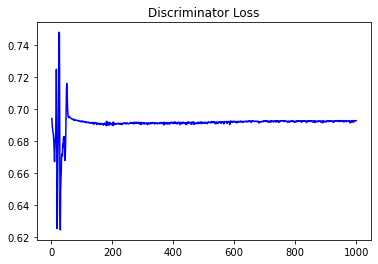

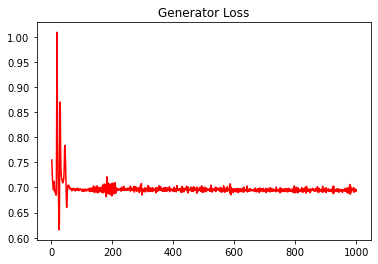

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.22403414496899504


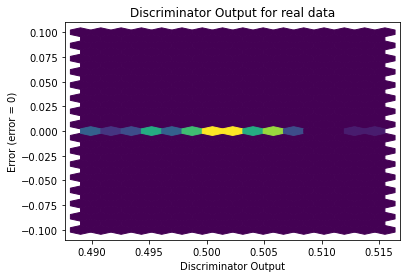

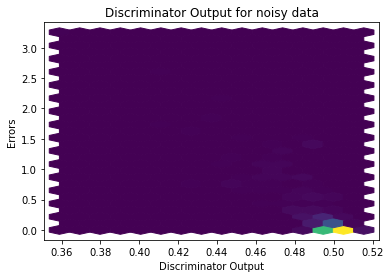

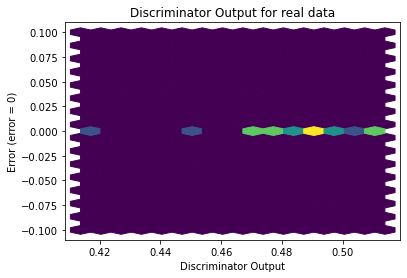

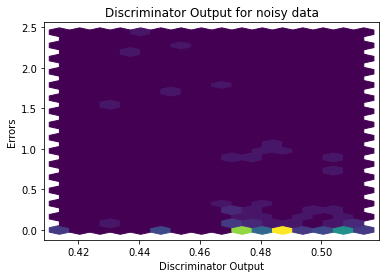

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


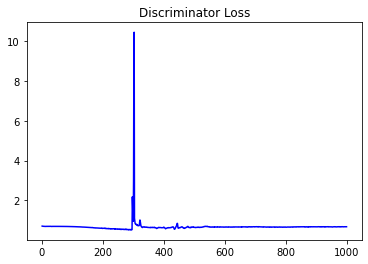

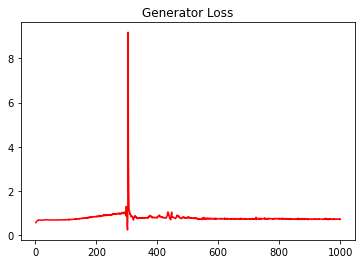

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.22052706630528598


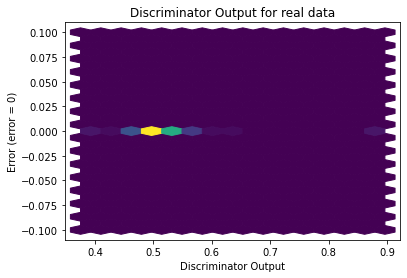

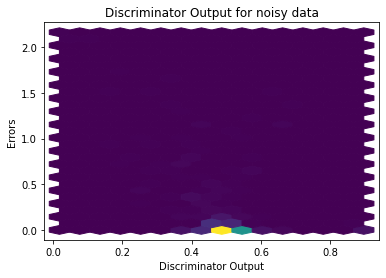

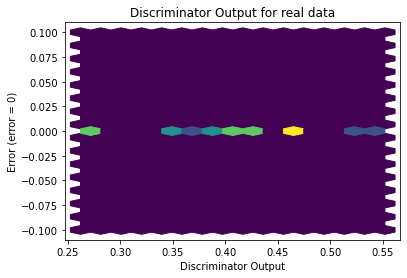

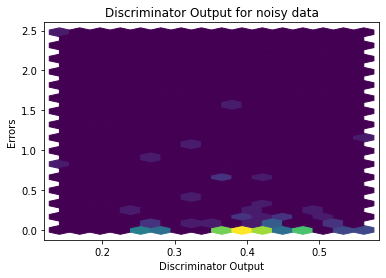

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0746]], requires_grad=True)
